<!-- Configure and load Thebe !-->
<script type="text/x-thebe-config">
{
   codeMirrorConfig: {
    readOnly: true
  },
  bootstrap: true,
  requestKernel: true,
  binderOptions: {
    repo: "hackenjoe/requirements",
  }
}
</script>
<script src="https://unpkg.com/thebe@latest/lib/index.js"></script>

(evaluation)=

# Interpretation und Auswertung
```{admonition} Erklärung zum Prozessschritt (Aufklappen)
:class: dropdown
In dieser Projektphase steht die Evaluation des zuvor entwickelten Modells im Fokus. Das ist ein wichtiger Schritt bevor das Modell dann wirklich zum Einsatz kommt. In manchen Fällen muss zur Ausgangssituation zurückgesprungen werden, wenn die Auswertungen zeigen, dass sich das Problem nicht mit dem Lernmodell lösen lässt. Umso wichtiger ist daher zu hinterfragen, ob dass Modell wirklich die Qualität bietet, um die vereinbarten Zielsetzungen zu erfüllen. Denn ist die KI-Lösung erst einmal im Produktivumfeld im Einsatz sind retrospektivische Schritte nur mit hohen Aufwänden realisierbar. Es gibt viele Möglichkeiten die Anwendungslösung zu testen und die Resultate zu evaluieren: Vom klassischen Testen des Anwenders bis hin zum Testeinsatz in einer kontrollierten Testumgebung. Häufig jedoch lassen sich bereits durch statistische Metriken die Güteklasse eines Modells im Vorfeld bestimmen. Hierbei ist es fundamental Daten zu verwenden, die das Modell bisher noch nicht gesehen hat. Diese werden auch Testdaten genannt. Zusammenfassend lässt sich diese Phase also in folgende Teilschritte unterteilen:

* Bewertung der Modellergebnisse durch unabhängige Daten
* Ganzheitliche Bewertung des Prozesses
* Nächste Schritte mit dem Anwender besprechen

Das KI-Kompetenzzentrum der THU erfüllt diese Aufgabe durch die fachgerechte Bewertung des Modells. Verschiedene Metriken und Kennzahlen unterstützen die Interpretierbarkeit der Anwendung. Hierbei ist auch ein Austausch mit Ihnen erforderlich, um die Ergebnisse zu validieren.
```

```{admonition} Handwerkerbewertungen:
:class: tip
Für die Klassifizierzung von neuen Handwerkerbewertungen könnte beispielsweise eine Wahrheitstabelle die Bewertungsgenauigkeit des Modells zeigen. Schließlich sollte das Modell stark genug für die automatische Klassifizierung eingehender neuer Kundenmails sein, weshalb ein akzeptabler Genauigkeitswert vorhanden sein sollte.
```

```{admonition} Hinweis:
:class: note
Diese Art der Klassifizierung die wir hier durchführen gehört terminologisch zu den Vorhersagenanalysen (engl. Predictive Analytics). Das Modell erhält neue noch nie zuvor gesehene Bewertungstexte und sagt dann voraus, ob es sich um eine negative, neutrale oder positive Rezension handelt (bevor ein Supportmitarbeiter überhaupt erst die Mail gelesen hat und selbst auf Basis seiner Erfahrungen den Text klassifiziert). 
```

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
from sentimental_imports import *
from sentimental_class import *
df = pd.read_csv("bewertungen_aufbereitet.csv")
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model_b = SentimentModel(model_name)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pascal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Testvorhersagen

In [2]:
bewertungsfunktion(df, model_b, n=15)

Bewertungstext,Vorhersage,Tatsächlich
"Boooman Wenn's gut werden muss, besser nicht zu Bauhaus.Bzw wenn es überhaupt was werden muss!!",😡,😡
Arbeit eins A super freundliche Arbeiter sauber alles erledigt auch unserer Heizungsbauer hat gesagt das er zum ersten Mal solche Elektriker sieht die ihren Dreck gleich wegräumen und nichts liegen lassen alles nur super danke an die besten Arbeiter der Firma Kaib. Könnte nur weiter empfehlen preisleistung top Elektro und pv Anlage alles super erklärt vor Ort gleich app installiert das alles sauber läuft wir sind zufrieden was wir alles bekommen haben. Danke nochmal......,😄,😄
"Schlechte Laune wird am Kunden ausgelassen, Termine werden nicht eingehalten (wurde bis zu 3 Mal vertröstet für EINE Sache). Es wurden Sachen genäht repariert die nicht in Auftrag gegeben worden sind (weil die Dame es nicht mehr genau wusste oder warum auch immer). Man ärgert sich dann nur, wenn man das Kleidungsstück anziehen möchte und feststellt, dass der eigentliche Auftrag nicht erfüllt worden ist. Kritikfähigkeit Ihrerseits = 0! Ich werde keine Kleidungsstücke mehr zu Frau Emmerich hinbringen. Das hat sich für mich erledigt. Da gibt es andere Geschäfte, die einfach kompetenter sind, was den Kundenservice insgesamt betrifft.",😡,😡
Der Mittarbeiter Herr M. ist schon teilweise recht merkwürdig. Aber die Arbeit die hier abgeliefert wurde überzeug im Ergebnis. Wir haben in unser neu erworbenen Wohnung das Badezimmer neu machen lassen und den Wohnbereich komplett mit einer Holzoptik-Fliese belegen lassen. Danke an das Hanse-Bäder Team und deren Partnerfirmen.,😄,😄
"angesichts der absolut vernachlässigten Vorsorgemassnahmen kann man zur Zeit vor einem Einkauf im Bauhaus Kassel nur abraten. Personal ohne Mundschutz , volle Gänge, keinerlei Abstand, unglaublich schlecht organisiert. Jedes andere Geschäft achtet auf die Regeln, hier kümmert es niemand . Ansteckungsgefahr sehr hoch . In normalen Zeiten kaufen wir sehr gern hier ein .",😡,😡
"Hält sich nicht an Terminabsprachen - mehr als ärgerlich für Berufstätige die sich die Zeit extra freischaufeln müssen.Effizienz des durchgeführten ""hydraulischen Abgleichs"" ohne Berücksichtigung der Rohrnetzlängen und des Durchflusses wirft Fragen auf.",😡,😡
"golocal Nutzer Ich habe mich für ein Nashorn mit Bemalung interessiert und im Shop angerufen. Dort bin ich, obwohl unbekannt, sehr gut am Telefon informiert worden. Habe dann wegen des anmalens, BVB, die Tel.-Nr. des Künstlers bekommen und mich sofort mit ihm kurz geschlossen. Auch hier alles super. Habe dann das Nashorn 50 cm gekauft und nun ist es auf dem Weg zum Künstler, alles umkompliziert und einfach. Ich freue mich schon auf das Ergebnis. ( Ist für meine Frau als BVB Fan ) D. Leske aus Dortmund",😄,😄
Haasceb5 via Androiddie Dachdecker Firma arbeitet mit guter Qualität,😄,😄
"Sehr zuverlässig, Fliesenarbeiten und Reparaturen werden zeitnah und professionell durchgeführt.",😄,😄
"Petrovic Kann nur Abraten, unfreundliche Mitarbeiter, Terminvergabe Katastrophal. Und keine Besserung von meinen Problem, außer das wöchentlich das Wasser abgestellt wird ohne das es dass Problem gelöst hat. Ich vermute das die Firma nur noch über Aufträge lebt die von der Stadtverwaltung kommen. Denn jede Konkurrenz Firma wirkt Kompetenter. Wirklich schade denn ich finde man sollte kleinere Betriebe unterstützen und fördern, aber hier ist das leider nicht der Fall.",😡,😡


Auf Basis der Handwerkerdaten sehen wir, dass unser entwickeltes KI-Modell fast immer korrekt die Klassifizierungen durchführt. Um jedoch nicht nur einen Auszug von Testfällen zu erhalten, gibt es diverse statistische Methoden um die Genaugikeit des Modells zu validieren.

#### Auswertung

In [3]:
%%time
# Wie viele Handwerkerbewertungen werden korrekt klassifiziert?
y_true = pd.read_csv("results.csv")["0"]
y_pred = pd.read_csv("results.csv")["1"]
print(classification_report(y_true, y_pred))

                    precision    recall  f1-score   support

negative Bewertung       0.87      0.93      0.90      8648
neutrale Bewertung       0.14      0.32      0.19       355
positive Bewertung       0.98      0.93      0.95     20009

          accuracy                           0.92     29012
         macro avg       0.66      0.73      0.68     29012
      weighted avg       0.94      0.92      0.93     29012

Wall time: 668 ms


Die Zielgenauigkeit (engl. accuracy) beträgt etwa 92%, was ein ziemlich guter und brauchbarer Scorewert für das Modell darstellt. Wir können diese Testgenauigkeit auch visuell betrachten:

<class 'numpy.ndarray'>
29012
Confusion matrix, without normalization
[[ 8002   350   296]
 [  135   115   105]
 [ 1029   362 18618]]


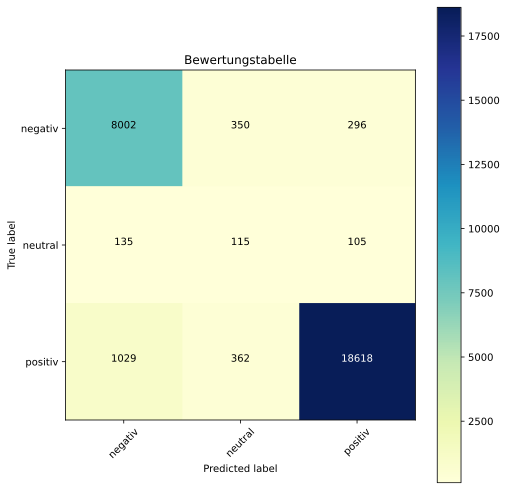

In [4]:
cm = confusion_matrix(y_true, y_pred)
print(f'{type(cm)}\n{np.sum(cm)}')
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, ['negativ', 'neutral', 'positiv'], title="Bewertungstabelle")

Die Diagonale dieser Tabelle stellt die richtig klassifizierten Handwerkerbewertungen dar. Alle Werte außerhalb der Diagonalen bilden hingegen falsche Vorhersagen ab. Demnach wurden 8002 negative Bewertungen, 115 neutrale Bewertungen und 18618 positive Bewertungen richtig klassifiziert. Dem gegenüber stehen 2.227 falsche Vorhersagen. Wir konnten also von 29.012 Testbewertungen rund 26.735 Bewertungen richtig einstufen. Das ist durchaus ein guter Wert. Durch Finetuning könnte man das Modell noch durch andere Parameter oder einfach durch erneutes Training noch weiter verbessern. Wie auch immer, das Modell entscheidet in über 9 Fällen von 10 richtig. Zeigen wir uns dennoch ein paar falsche Klassifikationen an:

In [5]:
df_t = pd.concat([pd.read_csv("handwerkerbewertungen_evaluation.csv"), pd.DataFrame(zip(y_true, y_pred), columns=["Tatsächlich", "Vorhersage"])], axis=1)
print(df_t[df_t["Tatsächlich"] != df_t["Vorhersage"]].shape)
df_t[df_t["Tatsächlich"] != df_t["Vorhersage"]].sample(3)

(2277, 6)


,Ranking,Bewertungstext,Anzahl Wörter,Token,Tatsächlich,Vorhersage
23230,5,"21 Schlüssel des Fahrradschlosses abgebrochen, das Fahrrad natürlich abgeschlossen. Holland in Not, da das Fahrrad am nächsten Tag gebraucht wurde. Erst telefonisch Tipps zur evt. Lösung des Probl...",66,"['schlüssel', 'fahrradschlosses', 'abgebrochen', 'fahrrad', 'natürlich', 'abgeschlossen', 'holland', 'not', 'fahrrad', 'nächsten', 'tag', 'gebraucht', 'wurde', 'erst', 'telefonisch', 'tipps', 'evt...",positive Bewertung,negative Bewertung
28251,5,Sommer Die Firma Schwätzer hat unser Bad barrierefrei umgebaut. Von der Angebotsabgabe bis zur endgültigen Fertigstellung hat alles reibungslos funktioniert. Obwohl wir 3 Wochen lang täglich mit d...,138,"['sommer', 'firma', 'schwätzer', 'bad', 'barrierefrei', 'umgebaut', 'angebotsabgabe', 'endgültigen', 'fertigstellung', 'reibungslos', 'funktioniert', 'obwohl', 'wochen', 'lang', 'täglich', 'mitarb...",positive Bewertung,negative Bewertung
28737,1,"Für ein Ersatzteil (Sprüharm) für einen Neff-Geschirrspüler musste ich 242,00 € nach 15 Tagen Wartezeit bezahlen. Der Sprüharm kostet im Netz 42€. Leider habe ich das zu spät festgestellt. Ich fin...",45,"['ersatzteil', 'sprüharm', 'tagen', 'wartezeit', 'bezahlen', 'sprüharm', 'kostet', 'netz', 'leider', 'spät', 'festgestellt', 'finde', 'preis', 'unverhältnismäßig', 'hoch', 'empfehle', 'ersatzteile...",negative Bewertung,neutrale Bewertung


Wie zu sehen ist, gibt es manche Bewertungstexte aus denen nicht ganz klar hervorgeht, ob es sich um eine positive, negative oder eher neutrale Bewertung handelt. Stellenweise ist es selbst aus Sichtweise eines Sachbearbeiters nicht einfach den Text eindeutig zu identifizieren. Zudem besteht auch die Chance, dass manche davon Fake Bewertungen sind. Ein weiterer Aspekt ist die Tatsache, dass die Rankings in den Testdaten oft subjektiv sind. Beispielsweise schreibt jemand eine sehr gute Bewertung und vergibt dennoch nur 3 oder 4 Sterne. Der semantische Inhalt der Bewertung muss nicht immer mit der tatsächlichen Bewertung übereinstimmen. Aber wir können das auch ganz einfach selbst, wie folgt, testen:


```{admonition} Textklassifizierer testen:
:class: dropdown
<pre data-executable="true" data-readonly="true" data-language="python">
from sentimental_class import *
import ipywidgets as widgets
x = widgets.Label("Gefühlsanalyse:", layout=widgets.Layout(display="flex", justify_content="center", width="40%", border="solid"))
text_widget = widgets.Textarea(
    value='Die Handwerksbetriebe in Ulm sind die besten!',
    placeholder='Gib eine Bewertung ein',
    description='Nachricht:',
    layout=widgets.Layout(display="flex", justify_content="center", width="40%"),
    disabled=False
)
model_b = SentimentModel("nlptown/bert-base-multilingual-uncased-sentiment")
res = model_b.predict_sentiment([text_widget.value])
emoji = lambda x: '😄' if 'positive' in x else ('😡' if 'neutral' not in x else '😐')
y = widgets.Label(emoji(res[0]), layout=widgets.Layout(display="flex", justify_content="center", width="40%", border="solid"))
button = widgets.Button(description="Ist das eine gute Bewertung?", layout=widgets.Layout(display="flex", justify_content="center", width="40%"))
output = widgets.Output()
def on_button_clicked(b):
    with output:
        res = model_b.predict_sentiment([text_widget.value])
        y.value=emoji(res[0])
button.on_click(on_button_clicked)
display(x, text_widget, button, y, output)
</pre>
```

```{exercise} Ihre Aufgaben
:class: dropdown
:nonumber: true
* Laden Sie das Jupyter Notebook `DataLab0x_Gefühlsanalyse_Evaluation.ipynb` und führen es aus. 
* Bei der `Bewertungsfunktion(n=15)` haben wir $15$ Handwerkerbewertungen betrachtet. Ergeben diese Sinn? Was ist mit den falsch vorhergesagten Bewertungen? Führen Sie die Funktion für $n=50$ aus.
* Auf der Homepage von [huggingface](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) gibt es neben der normalen Testgenauigkeit (engl. accuracy) noch eine weitere: die sog. *accuracy off-by-1*. Was bedeutet diese? Ergänzen Sie das Skript um eine Funktion die diese Metrik verwendet. Vergleichen Sie die neue accuracy anschließend mit der bisherigen. Ist die Genauigkeit besser geworden?
```